### Import Library 

In [ ]:
import matplotlib.pyplot as plt # plot grafik
import matplotlib.gridspec as gridspec 
import matplotlib.animation as anim

### Definition

In [2]:
import numpy as np
l = 1.0
theta0 = np.deg2rad(45)
def pendulumPostionXY(theta):
    return l*np.sin(theta),-l*np.cos(theta)
def alpha(theta):
    return -9.8*np.sin(theta)
def x(theta):
    return l*np.sin(theta)

### Numerical Method

In [43]:
thetaVal = []
omegaVal = []
xVal = []
alphaVal = []
timeList = np.linspace(0,10,1000)
def calculate():
    omega0 = 0.0
    theta0 = np.deg2rad(45)
    dt = 0.04

    for t in timeList:    
        omega0 += dt*alpha(theta0)
        theta0 += dt*omega0
        omegaVal.append(omega0)
        thetaVal.append(theta0)
        alphaVal.append(alpha(theta0))
    for theta in thetaVal:
        xVal.append(x(theta))
calculate()

### Doing Animation and Plot Data

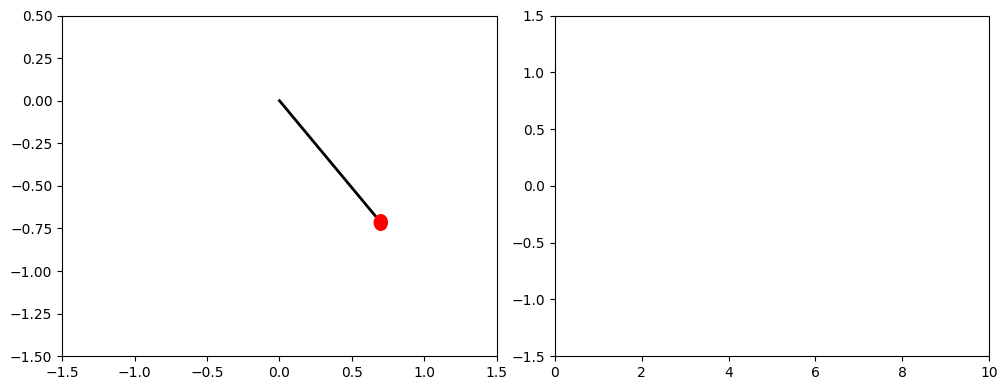

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
plt.tight_layout()
ax[0].set_xlim(-1.5,1.5)
ax[0].set_ylim(-1.5,0.5)
ax[1].set_xlim(0,10)
ax[1].set_ylim(-1.5,1.5)
#ax[0].set_position([5,5,1,1])
#ax[1].set_position([1,5,2,1])

x0,y0 = pendulumPostionXY(theta0)
line, = ax[0].plot([0,x0],[0,y0],lw=2,c='k')
circle = ax[0].add_patch(plt.Circle(pendulumPostionXY(theta0),0.05,fc='r',zorder=3))
wave, = ax[1].plot([],[],'g')

def animate(i):
    x,y = pendulumPostionXY(thetaVal[i])
    line.set_data([0,x],[0,y])
    circle.set_center((x,y))
    wave.set_data(timeList[:i+1],xVal[:i+1])
    
animation = anim.FuncAnimation(fig,animate,frames=len(2*timeList))
ffmpeg_writer = anim.FFMpegWriter(fps=60)
animation.save('pendulumfix.mp4',writer=ffmpeg_writer)

In [ ]:
# Mendefinisikan variabel yang digunakan
m = 1.0  # Massa (kg)
l = 1.0  # Panjang tali (m)
g = 9.81  # Percepatan gravitasi (m/s^2)
b = 0.6  # Konstanta redaman
theta0 = np.pi/4  # Sudut awal (rad)
omega0 = 0.0  # Kecepatan sudut awal (rad/s)

# Mendefinisikan persamaan fisika yang digunakan
def pendulumPostionXY(theta):
    return l*np.sin(theta),-l*np.cos(theta)
def posXdammped(theta):
    return l*np.sin(theta)
def acc(theta,omega):
    return -(g/l)*np.sin(theta) 

In [ ]:
# Membuat list waktu sebagai fungsi numerik dari integrasi dan diferensiasi
timeList = np.linspace(0,10,1000) # domain
omegaValdamp = []
thetaValdamp = []
accValdamp = []
xValdamp = []


def calculate():
    omega0 = 0.0
    theta0 = np.deg2rad(45)
    dt = 0.04

    for t in timeList:    
        omega0 += dt*acc(theta0,omega0)
        theta0 += dt*omega0
        omegaValdamp.append(omega0)
        thetaValdamp.append(theta0)
        accValdamp.append(acc(theta0,omega0))
    for theta in thetaValdamp:
        xValdamp.append(posXdammped(theta))
calculate()

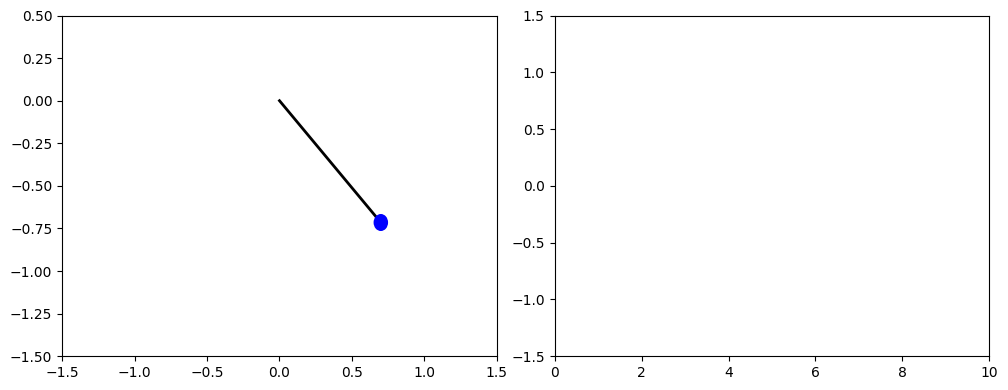

In [26]:

fig, ax = plt.subplots(1,2,figsize=(10,4))
plt.tight_layout()
ax[0].set_xlim(-1.5,1.5)
ax[0].set_ylim(-1.5,0.5)
ax[1].set_xlim(0,10)
ax[1].set_ylim(-1.5,1.5)
#ax[0].set_position([5,5,1,1])
#ax[1].set_position([1,5,2,1])

x0,y0 = pendulumPostionXY(theta0)
line, = ax[0].plot([0,x0],[0,y0],lw=2,c='k')
circle = ax[0].add_patch(plt.Circle(pendulumPostionXY(theta0),0.05,fc='b',zorder=3))
wave, = ax[1].plot([],[],'g')

def animate(i):
    x,y = pendulumPostionXY(thetaValdamp[i])
    line.set_data([0,x],[0,y])
    circle.set_center((x,y))
    wave.set_data(timeList[:i+1],xValdamp[:i+1])
    
animation = anim.FuncAnimation(fig,animate,frames=len(2*timeList))
ffmpeg_writer = anim.FFMpegWriter(fps=60)
animation.save('pendulumfixdamp.mp4',writer=ffmpeg_writer)

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter
m = 1.0  # Massa (kg)
l = 1.0  # Panjang tali (m)
g = 9.81  # Percepatan gravitasi (m/s^2)
b = 0.6  # Konstanta redaman
theta0 = np.pi/4  # Sudut awal (rad)
omega0 = 0.0  # Kecepatan sudut awal (rad/s)
dt = 0.01  # Langkah waktu (s)
t_max = 10.0  # Waktu simulasi (s)

# Inisialisasi
time = np.linspace(0,10,100)
t = np.arange(0, t_max, dt)
theta = np.zeros_like(t)
omega = np.zeros_like(t)
theta[0] = theta0
omega[0] = omega0

def posX(theta):
    return l*np.sin(theta)
# Metode Euler
for i in range(1, len(t)):
    theta_acc = -(g/l)*np.sin(theta[i-1]) - (b/m)*omega[i-1]
    omega[i] = omega[i-1] + theta_acc*dt
    theta[i] = theta[i-1] + omega[i]*dt

xVal = []
for q in theta:
    xVal.append(posX(q))
# Animasi
fig, ax = plt.subplots(1,2,figsize=(10,4))
plt.tight_layout()
line, = ax[0].plot([], [], 'o-', lw=2)
wave, = ax[1].plot([],[],'g')
ax[0].set_xlim(-1.2*l, 1.2*l)
ax[0].set_ylim(-1.2*l, 0.2*l)
ax[1].set_xlim(0,10)
ax[1].set_ylim(-0.5,0.5)


def animate(i):
    x = l*np.sin(theta[i])
    y = -l*np.cos(theta[i])
    line.set_data([0, x], [0, y])
    wave.set_data(time[:i+1],xVal[:i+1])
    

ani = anim.FuncAnimation(fig, animate, frames=len(t), interval=10)
ffmpeg_writer = anim.FFMpegWriter(fps=60)
ani.save('pendulumdammped.mp4',writer=ffmpeg_writer)

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (100,) and arg 1 with shape (101,).

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (100,) and arg 1 with shape (101,).

<Figure size 1000x400 with 2 Axes>

In [ ]:
from manimlib import 